#Post-Processing Calibration Results

Use this script to load and plot calibration results.

##Setup

First, you will need to load all necessary libraries, set up your access to google drive, and load necessary functions. 



In [ ]:
# Load necessary libraries
import collections
import sys
import textwrap
import math
import csv
import numpy as np 
import statistics as stat
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
from pathlib import Path
from google.colab import drive
from google.colab import auth
from google.colab import files

In [ ]:
# authenticate user - pop up will ask you to allow Colab to use your Google account for this notebook
auth.authenticate_user()

In [ ]:
# mount Google Drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load necessary functions from Utils.py:
!cp /content/drive/MyDrive/Colab\ Notebooks/Utils.ipynb /content
%run Utils.ipynb

## Define Paths

`path` is the location of your csv files

`path_itr` is the location of your iteration files (only needed if you'd like to look at the convergence of error)

In [ ]:
# Path to your csv files (and iteration files):
path='/content/drive/Shareddrives/TEM_Colab/MADS-Calibration/MD3/csv/'
path_itr='/content/drive/Shareddrives/TEM_Colab/MADS-Calibration/MD3/final_res/'

## STEP 1 PLOTS

Be sure to update with your csv filenames

In [ ]:
filename='STEP1-MD3_CR.csv'
filename2='STEP1-MD3_CR2.csv'
filename_itr='STEP1-MD3_CR2.iterationresults' #optional
p=read_csv_params(filename)
p2=read_csv_params(filename2)
mparams=merge_parameter(p,p2)
print(mparams)

e1=read_csv_errors(filename)
e2=read_csv_errors(filename2)
err=e1+e2
print(err)

{'cmax0': [7.943399168850462, 6.993911268658151, 6.995473382893328, 6.993220364660742, 6.99297852227955, 6.99322714424622], 'cmax1': [210.2814674978339, 210.2120193429432, 210.21130145394608, 210.21107585399616, 210.17757817953094, 210.21118665137132], 'cmax2': [1034.136500538425, 1033.312091916996, 1033.4733822758922, 1033.4723647436604, 1033.1130216257225, 1033.4731984285545], 'cmax3': [1.3270625809551504, 1.114597734185495, 1.1108007779864066, 1.1107737331213325, 1.1108018076462494, 1.1107718583406336]}
['870.7840085573001', '0.08915524144501422', '0.020910325199581255', '9.200871447851189e-6', '0.000981432329766999', '0.008354421262399462']


Note: 

`mparams` is a dictionary, with keys being parameters and values being the optimal values found for that key.

`err` is a list of the final errors for each calibration run.

The dictionary of parameters and list of errors is then used to plot the histograms:

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


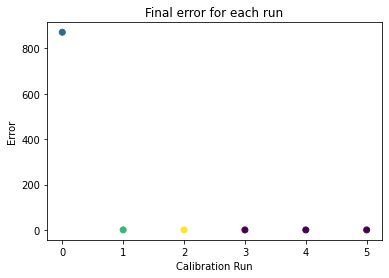

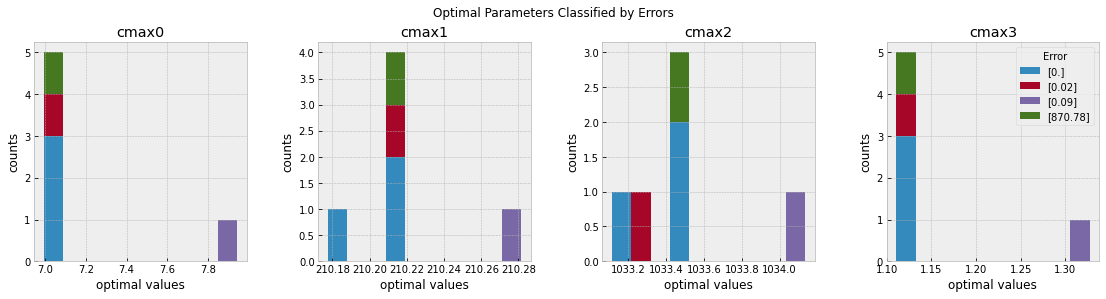

In [ ]:
#plot errors (use this to quickly identify runs with low/high error)
plot_err(err)

#Get error clusters for histogram
float_err=[float(x) for x in err]
rounded_err=list(np.round(float_err,7))
#Organize parameters values by kmeans clusters
y_kmeans,centers=get_err_clusters(float_err)

plot_stacked_histograms(mparams,centers,y_kmeans,std=0)

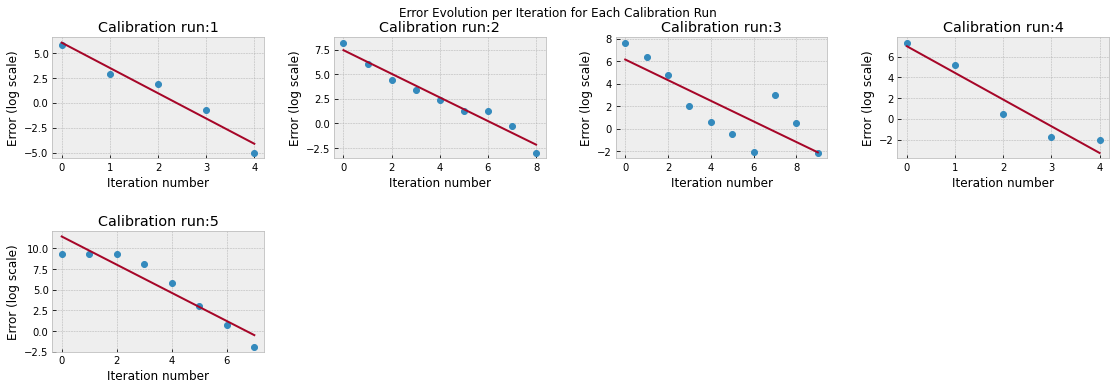

In [ ]:
#plot iteration file errors
rounded_err_itr,idx,err_by_run=load_sort_itr_err(path_itr,filename_itr)
plot_err_by_run(err_by_run, deg=1)

## STEP 2 PLOTS

Be sure to update with your csv filenames where appropriate

In [ ]:
filename='STEP2-MD3_CR.csv'
filename_itr='STEP2-MD3_CR.iterationresults'
mparams=read_csv_params(filename)
print(mparams)

err=read_csv_errors(filename)
print(err)

{'nmax0': [10.894390369317364, 6.779368621705743, 1.8424113562053606, 11.465557525138815, 14.956586148010434, 14.165758556814371, 5.0566634424547825, 6.199262529958037, 9.174606571853463, 11.219895622039333], 'nmax1': [8.125005643875273, 8.245609319759575, 8.239245753468081, 8.114173088831073, 8.208750584313014, 8.2960278913142, 8.0412537146563, 8.306680105607581, 8.219014070196488, 8.33224986946281], 'nmax2': [23.03167964236295, 30.897754280957063, 30.12741231222368, 21.552320229724206, 25.341978469518658, 30.94999820367277, 32.20043991999704, 22.37309652060354, 27.93610788969117, 28.10987583743571], 'nmax3': [4.083669460894688, 1.6611897302210046, 3.655461637303354, 1.0509805182851242, 3.177754689839066, 3.847292323516718, 1.1043646327121888, 3.5406536760399914, 2.950288816631721, 2.708034905870765]}
['8.774468397869518e7', '8.780494434835707e7', '8.780646301581928e7', '8.771223861650862e7', '8.77872411033937e7', '8.780073377695063e7', '8.784458509284794e7', '8.771617490386836e7', '8

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


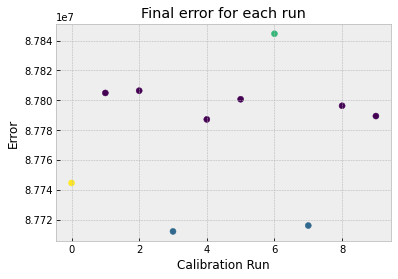

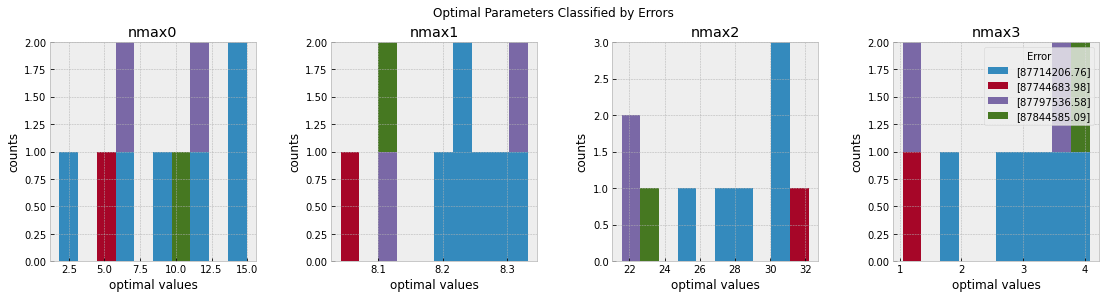

In [ ]:
#plot errors (use this to quickly identify runs with low/high error)
plot_err(err)

#Get error clusters for histogram
float_err=[float(x) for x in err]
rounded_err=list(np.round(float_err,7))
#Organize parameters values by kmeans clusters
y_kmeans,centers=get_err_clusters(float_err)

plot_stacked_histograms(mparams,centers,y_kmeans,std=0)

## STEP 3C PLOTS

Be sure to update with your csv filenames where appropriate

In [ ]:
filename='STEP3-MD3_CR1.csv'
filename2='STEP3-MD3_CR2.csv'
filename_itr='STEP3-MD3_CR1.iterationresults'
p=read_csv_params(filename)
p2=read_csv_params(filename2)
mparams=merge_parameter(p,p2)
print(mparams)

e1=read_csv_errors(filename)
e2=read_csv_errors('STEP3-MD3_CR2.csv')
err=e1+e2
print(err)

{'nmax0': [14.914752288020825, 1.791451659480996, 8.314681387818258, 10.397413664611044, 1.834423857395647, 13.2724668119979, 14.991388314507702, 2.011633168817499, 2.2876988435094456, 10.505517660220578, 10.946767269334773, 5.565322300969352, 1.5834885548596953, 13.644399431283585, 10.112792370408814, 4.937237337316098, 2.3543950773879927, 1.5217350640836362, 14.879256218597785, 1.5096256081158095], 'nmax1': [3.671288059761828, 1.0047811860926403, 8.135354646100303, 1.0119429659081578, 1.1256852269425524, 7.381738135831438, 6.562024082902073, 8.62403377951889, 3.4748168779963176, 2.3820490839679564, 3.093521941578109, 7.87474829472884, 6.328614480315755, 1.0575806196933146, 9.99868489649899, 9.999355698443463, 3.0641699168503305, 1.2266666969329048, 9.429700522877694, 3.6973045985562036], 'nmax2': [4.341030666498355, 3.999531539729953, 4.333204246877403, 4.562420306387033, 3.901875523980154, 11.75351813235653, 29.101134332388494, 5.631958515217537, 4.408125142867241, 4.145135838039397

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


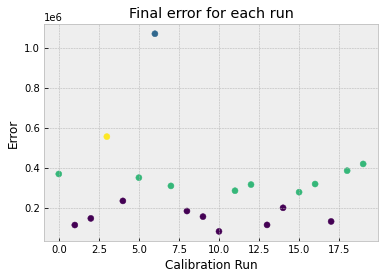

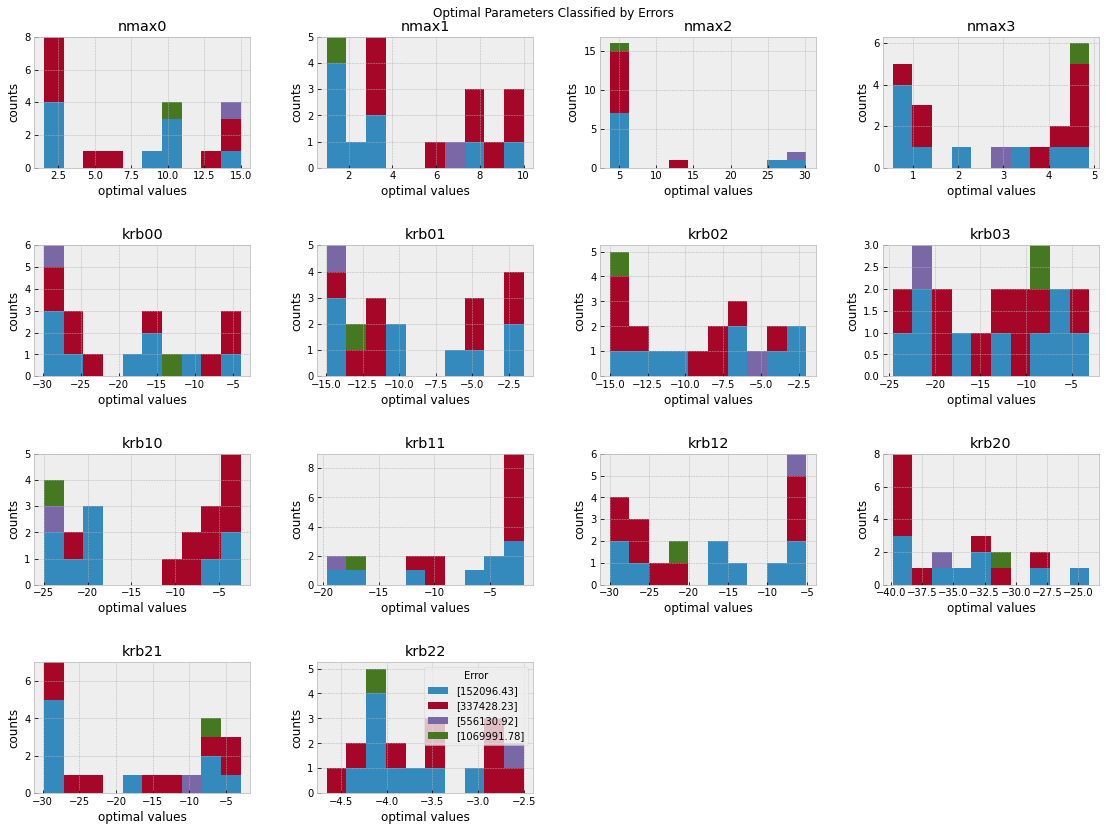

In [ ]:
#plot errors (use this to quickly identify runs with low/high error)
plot_err(err)

#Get error clusters for histogram
float_err=[float(x) for x in err]
rounded_err=list(np.round(float_err,7))
#Organize parameters values by kmeans clusters
y_kmeans,centers=get_err_clusters(float_err)

plot_stacked_histograms(mparams,centers,y_kmeans,y=12,r=4,c=4,std=0)